Training Model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ramen_rating_2023_final.csv')
df

,Stars,IsSpicy,HasChicken,HasBeef,HasSeafoods,With_Cup,With_Other,With_Pack,With_Tray,from_Acecook,...,In_Indonesia,In_Japan,In_Malaysia,In_Other,In_Singapore,In_South Korea,In_Taiwan,In_Thailand,In_United States,In_Vietnam
0,5.0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4.5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4.5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4628,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4629,2.0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4630,2.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df['Stars'].value_counts()

Stars
5.000    938
3.500    678
3.750    643
4.000    541
4.500    315
3.250    250
4.250    240
3.000    208
2.750    124
2.000    124
2.500    117
4.750    113
1.500     64
0.000     61
1.000     53
1.750     35
2.250     33
0.500     26
0.250     24
1.250     18
0.750      3
3.100      2
4.125      2
2.900      2
1.100      2
2.800      2
4.350      1
3.400      1
3.650      1
3.200      1
2.300      1
2.850      1
3.600      1
0.100      1
3.700      1
2.125      1
3.125      1
0.900      1
2.100      1
1.800      1
Name: count, dtype: int64

(array([  86.,   30.,   73.,  100.,  160.,  246.,  463., 1324.,  784.,
        1366.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

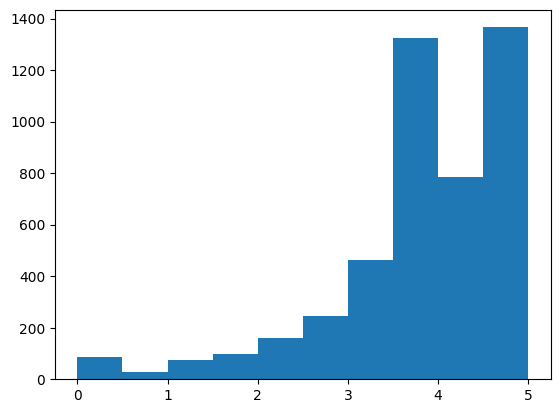

In [4]:
plt.hist(df['Stars'])

In [5]:
df['Stars'].median()

3.75

In [6]:
df['binStars'] = df['Stars'].apply(lambda x: 1 if x > 3.75 else 0)
df

,Stars,IsSpicy,HasChicken,HasBeef,HasSeafoods,With_Cup,With_Other,With_Pack,With_Tray,from_Acecook,...,In_Japan,In_Malaysia,In_Other,In_Singapore,In_South Korea,In_Taiwan,In_Thailand,In_United States,In_Vietnam,binStars
0,5.0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,5.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4.5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,5.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4628,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4629,2.0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4630,2.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
df['binStars'].value_counts()

binStars
0    2482
1    2150
Name: count, dtype: int64

In [8]:
x = df.drop(['binStars', 'Stars'], axis=1)
y = df['binStars']

In [9]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

LogisticRegression

In [10]:
#LogisticRegression
logr = LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)

In [11]:
confusion_matrix(y_test, logr_pred)

array([[332, 165],
       [172, 258]], dtype=int64)

In [12]:
print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       497
           1       0.61      0.60      0.60       430

    accuracy                           0.64       927
   macro avg       0.63      0.63      0.63       927
weighted avg       0.64      0.64      0.64       927



DecisionTreeClassifier

In [13]:
#decisiontreeclassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

In [14]:
confusion_matrix(y_test, tree_pred)

array([[335, 162],
       [170, 260]], dtype=int64)

In [15]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       497
           1       0.62      0.60      0.61       430

    accuracy                           0.64       927
   macro avg       0.64      0.64      0.64       927
weighted avg       0.64      0.64      0.64       927



RandomForestClassifier

In [16]:
#RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)

In [17]:
confusion_matrix(y_test, forest_pred)

array([[317, 180],
       [157, 273]], dtype=int64)

In [18]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       497
           1       0.60      0.63      0.62       430

    accuracy                           0.64       927
   macro avg       0.64      0.64      0.64       927
weighted avg       0.64      0.64      0.64       927



Kiểm tra các hệ số thể hiện mức độ ảnh hưởng của mỗi đặc trưng đến dự đoán của mô hình

In [19]:
logr_feature = pd.DataFrame({"feature": x.columns,
                             "importance": logr.coef_[0]})
logr_feature.sort_values('importance', ascending=False)

,feature,importance
20,from_MyKuali,1.603048
5,With_Other,1.232655
39,In_Indonesia,0.853913
23,from_Nongshim,0.818195
14,from_MAMA,0.687887
41,In_Malaysia,0.675697
27,from_Samyang Foods,0.669860
45,In_Taiwan,0.620057
43,In_Singapore,0.454934
40,In_Japan,0.452769


In [20]:
tree_feature = pd.DataFrame({"feature": x.columns,
                             "importance": tree.feature_importances_})
tree_feature.sort_values('importance', ascending=False)

,feature,importance
42,In_Other,0.110461
0,IsSpicy,0.075000
3,HasSeafoods,0.068729
1,HasChicken,0.056816
4,With_Cup,0.051288
2,HasBeef,0.048405
6,With_Pack,0.046491
46,In_Thailand,0.046056
48,In_Vietnam,0.045006
24,from_Other,0.040245


In [21]:
forest_feature = pd.DataFrame({"feature": x.columns,
                             "importance": forest.feature_importances_})
forest_feature.sort_values('importance', ascending=False)

,feature,importance
0,IsSpicy,0.093872
42,In_Other,0.077570
6,With_Pack,0.064278
3,HasSeafoods,0.062721
1,HasChicken,0.056151
4,With_Cup,0.052548
2,HasBeef,0.044440
24,from_Other,0.042196
47,In_United States,0.034972
22,from_Nissin,0.029716


In [22]:
import pickle

In [23]:
pickle.dump(logr, open('LogR_Model.pkl','wb'))
pickle.dump(tree, open('Tree_Model.pkl','wb'))
pickle.dump(forest, open('Forest_Model.pkl','wb'))